# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: November 8, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Data

The data is generated synthetically, one set for every student, using ```sklearn.datasets.make_classification```.


### Evaluation

Submissions will be scored according to Categorization Accuracy.
This Kaggle Metric requires the following columns: Id (String) and Category (String).
The solution file should be in a CSV format.


### File Descriptions

 * `5challenge_training_netid.csv` – the training data
 * `5challenge_testing_netid.csv` – the test data
 

### Deliverables

User submissions are evaluated by comparing their submission CSV to the ground truth solution CSV with respect to Categorization Accuracy.
Documents to be submitted are as follows.

__GitHub__: Every student should commit and push files.
 1. A pediction file; Fill column ```Class``` in the testing file.
     * `ECEN689-Fall2018 -> Challenges -> 5Files -> 5challenge_testing_netid.csv`
 2. Jupyter notebook code or Python code within your own directory.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.
     * `ECEN689-Fall2018 -> Students -> GitHubID -> 5challenge_testing_netid.csv`


In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
#Training file
student_identity = 'mahalakshmi'

filenameToRead_training = '5challenge_training_' + student_identity + '.csv'
#training_df = pd.read_csv('5Files/' + filenameToRead)
training_df = pd.read_csv('C:/Users/mahal/OneDrive/Documents/Mahalakshmi/Applied Info Science/Challenge 5/' + filenameToRead_training)

print(training_df.head())

   Unnamed: 0  Class  Feature 0  Feature 1
0           0      0   0.628806   0.292422
1           1      1  -0.050604   1.030436
2           2      0  -0.480929   0.180668
3           3      1  -0.608519   0.712693
4           4      1   1.690121  -1.752753


In [3]:
#Testing file
filenameToRead_testing = '5challenge_testing_' + student_identity + '.csv'
testing_df = pd.read_csv('C:/Users/mahal/OneDrive/Documents/Mahalakshmi/Applied Info Science/Challenge 5/' + filenameToRead_testing)

print(testing_df.head())

   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1   0.696306  -0.672890
1           1      0  -1.886484  -0.123244
2           2      0  -1.093314   1.419259
3           3      0  -0.784703   0.855919
4           4      1  -0.102264   0.934982


In [4]:
X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values

In [5]:
Y1=Y1.ravel()

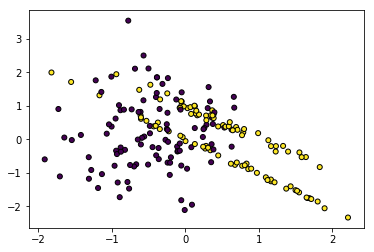

In [6]:
#Plot training data
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
plt.show()

In [7]:
#Linear kernel SVC
classifier_linear=SVC(kernel='linear') 
classifier_linear.fit(X1,Y1)
classifier_linear.score(X1,Y1)

0.78

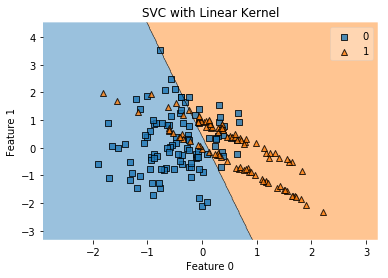

In [8]:
#Plot Linear kernel SVC
plot_decision_regions(X=X1,y=Y1,clf=classifier_linear)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVC with Linear Kernel')
plt.show()

In [9]:
#Polynomial kernel SVC
classifier_poly=SVC(kernel='poly')
classifier_poly.fit(X1,Y1)
classifier_poly.score(X1,Y1)

0.725

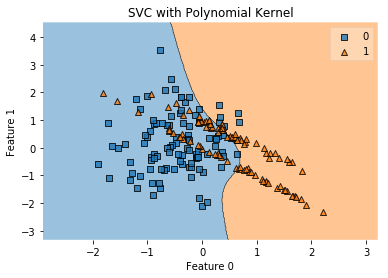

In [10]:
#Plot Polynomial kernel SVC
plot_decision_regions(X=X1,y=Y1,clf=classifier_poly)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVC with Polynomial Kernel')
plt.show()

In [11]:
#Sigmoid kernel SVC
classifier_sigmoid=SVC(kernel='sigmoid')
classifier_sigmoid.fit(X1,Y1)
classifier_sigmoid.score(X1,Y1)

0.6

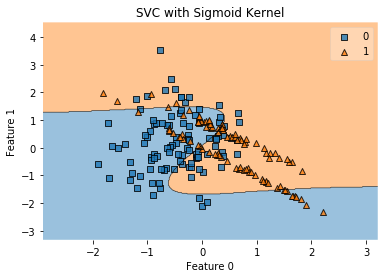

In [12]:
#Plot Sigmoid kernel SVC
plot_decision_regions(X=X1,y=Y1,clf=classifier_sigmoid)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVC with Sigmoid Kernel')
plt.show()

In [13]:
#RBF Kernel SVC
classifier_rbf=SVC(kernel='rbf')
classifier_rbf.fit(X1,Y1)
classifier_rbf.score(X1,Y1)

0.79

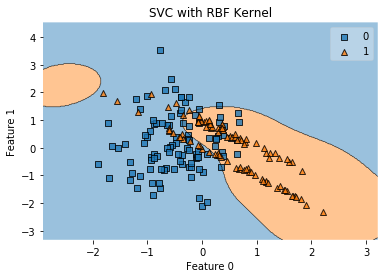

In [14]:
#Plot RBF Kernel SVC
plot_decision_regions(X=X1,y=Y1,clf=classifier_rbf)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVC with RBF Kernel')
plt.show()

In [15]:
#Find the optimal parameters
list_c = np.logspace(-2, 5, 8)
list_gamma = np.logspace(-2, 5, 8)
grid_parameters = dict(gamma=list_gamma, C=list_c)
cv = StratifiedShuffleSplit(test_size=0.2)
OptGrid = GridSearchCV(SVC(), param_grid=grid_parameters, cv=None)
OptGrid.fit(X1, Y1)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
print(OptGrid.best_params_, OptGrid.best_score_)

{'C': 1.0, 'gamma': 10.0} 0.835


In [17]:
#RBF Kernel with Optimal parameters
#{'C': 1.0, 'gamma': 10.0} 0.835
classifier_rbf_optimized = SVC(kernel='rbf',gamma=10,C=1)
classifier_rbf_optimized.fit(X1,Y1)
classifier_rbf_optimized.score(X1,Y1)

0.895

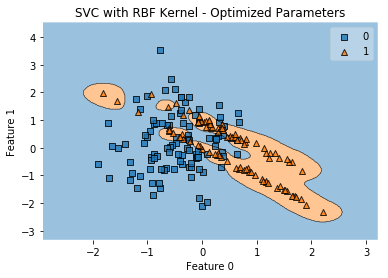

In [18]:
#Plot RBF Kernel with Optimal parameters
plot_decision_regions(X=X1,y=Y1,clf=classifier_rbf_optimized)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVC with RBF Kernel - Optimized Parameters')
plt.show()

In [19]:
#Predict test output with trained classifier model
X_test = testing_df[['Feature 0', 'Feature 1']].values
Y_predicted = classifier_rbf_optimized.predict(X_test)
testing_df['Class'] = Y_predicted

In [20]:
testing_df.head()

,Unnamed: 0,Class,Feature 0,Feature 1
0,0,1,0.696306,-0.672890
1,1,0,-1.886484,-0.123244
2,2,0,-1.093314,1.419259
3,3,0,-0.784703,0.855919
4,4,1,-0.102264,0.934982


In [21]:
#Modification to match output file template
testing_df.rename( columns={'Unnamed: 0':''}, inplace=True )
testing_df.head()

,,Class,Feature 0,Feature 1
0,0,1,0.696306,-0.672890
1,1,0,-1.886484,-0.123244
2,2,0,-1.093314,1.419259
3,3,0,-0.784703,0.855919
4,4,1,-0.102264,0.934982


In [22]:
#Write to output file
testing_df.to_csv('5challenge_testing_mahalakshmi.csv', index=False)